In [27]:
import numpy as np
import matplotlib.pyplot as plt
try:
    plt.style.use("jupyter")
except OSError:
    print("Delaut syle in use")

## Zeroth-moment

the zeroth-moment ($\mu_0$) of the Boundary Data Immersion Method is

\begin{equation}
    \mu_0 = \int \phi_\varepsilon(\vec{x}\cdot\hat{n}, \vec{x}_b\cdot\hat{n})\,\,\text{d}\vec{x}_b^{\hat{n}}
\end{equation}

where the integration is done normal to the boundary. A typical kernel is

\begin{equation}
    \phi_\varepsilon(x) = \begin{cases}
    \frac{1}{2\varepsilon}(1+cos(\frac{x}{\varepsilon}\pi)) \qquad \text{if   } |x| < \varepsilon \\
    0 \qquad\qquad\qquad\qquad\text{if    } |x| \ge \varepsilon \\
    \end{cases}
\end{equation}

The zeroth-moment is

\begin{equation}
    \mu_0 =\int \frac{1}{2\varepsilon}(1+\cos(\frac{x}{\varepsilon}\pi))\,\,\text{d}x
\end{equation}

integrating both term separately, we get

\begin{equation}
    \mu_0 =\frac{1}{2\varepsilon}\left(\int \text{d}x+\int cos(\frac{x}{\varepsilon}\pi)\,\,\text{d}x\right)
\end{equation}

the first term is easily obtained, the second term requires substitution of $\frac{x}{\varepsilon}\pi = u$ and $dx= \frac{\varepsilon}{\pi}du$ which gives

\begin{equation}
    \mu_0 =\frac{1}{2\varepsilon}\left(x + \int \frac{\pi}{\varepsilon}\cos(u)\,\,\text{d}u\right) = \frac{1}{2\varepsilon}\left(x + \frac{\pi}{\varepsilon}\sin(\frac{x}{\varepsilon}\pi) + C\right).  
\end{equation}

or

\begin{equation}
    \mu_0 =\frac{x}{2\varepsilon} + \frac{1}{2\pi}\sin(\frac{x}{\varepsilon}\pi) + C. 
\end{equation}

The integral constant is found considering the BC of the problem. We want the integral to vanish at $x=-\varepsilon$ thus, substituting gives

\begin{equation}
    -\frac{1}{2} + C = 0 \rightarrow  C = \frac{1}{2}
\end{equation}

finally
\begin{equation}
    \mu_0 =\frac{x}{2\varepsilon} + \frac{1}{2\pi}\sin(\frac{x}{\varepsilon}\pi) + \frac{1}{2} = \frac{1}{2}\left(1 + \frac{x}{\varepsilon} + \frac{1}{\pi}\sin\left(\frac{x}{\varepsilon}\pi\right)\right)  
\end{equation}


In [2]:
def mu_0(d, e):
    return np.where(d<=-e, 0, np.where(abs(d)<e, 0.5*(1 + d/e + 1./np.pi*np.sin(d*np.pi/e)), 1.))

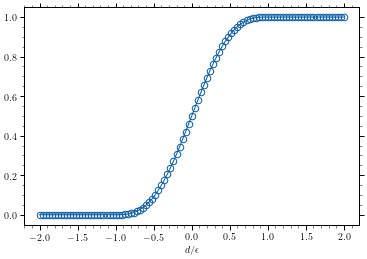

In [3]:
x = np.linspace(-2, 2, 101)
plt.plot(x, mu_0(x, 1), "-o"); plt.xlabel(r"$d/\epsilon$");

## First-moment


the first moment $\mu_1$ is defined as
\begin{equation}
    \mu_1 = \int (\vec{x}-\vec{x}_b)\cdot\hat{n}\phi_\varepsilon(\vec{x}\cdot\hat{n}, \vec{x}_b\cdot\hat{n})\,\,\text{d}\vec{x}_b^{\hat{n}}
\end{equation}

using the same kernel as before and letting $x:=(\vec{x}-\vec{x}_b)\cdot\hat{n}$ we get

\begin{equation}
    \mu_1 = \int\frac{x}{2\varepsilon}(1+\cos(\frac{x}{\varepsilon}\pi))\,\,\text{d}x
\end{equation}

evaluating each term individually we get

\begin{equation}
    \mu_1 = \frac{1}{2\varepsilon}\left(\int x\,\,\text{d}x + \int x\cos(\frac{x}{\varepsilon}\pi)\,\,\text{d}x\right) 
\end{equation}

the first term is easily evaluated. The second term requires integration by parts (we want to get rid of the $x$)

\begin{equation}
    \mu_1 = \frac{1}{2\varepsilon}\left(\frac{x^2}{2} + A + x\frac{\varepsilon}{\pi}\sin(\frac{x}{\varepsilon}\pi) - \int\frac{\varepsilon}{\pi}\sin(\frac{x}{\varepsilon}\pi) \,\,\text{d}x\right)
\end{equation}

we need to use substitution for the last term, and we get

\begin{equation}
    \mu_1 = \frac{1}{2\varepsilon}\left(\frac{x^2}{2} + A + x\frac{\varepsilon}{\pi}\sin(\frac{x}{\varepsilon}\pi) + \frac{\varepsilon^2}{\pi^2}\cos(\frac{x}{\varepsilon}\pi)  + B\right)
\end{equation}

re-arranging

\begin{equation}
  \mu_1 = \frac{x^2}{4\varepsilon} + \frac{x}{2\pi}\sin(\frac{x}{\varepsilon}\pi) + \frac{\varepsilon}{2\pi^2}\cos(\frac{x}{\varepsilon}\pi) + C
\end{equation}

we want the first moment to vanish at $x=-\varepsilon$ thus

\begin{equation}
    \frac{\varepsilon}{4} + 0 - \frac{\varepsilon}{2\pi^2} + C = 0 \rightarrow C = -\frac{\varepsilon}{4} + \frac{\varepsilon}{2\pi^2}
\end{equation}

replacing in the previous expression

\begin{equation}
    \mu_1 = \frac{x^2}{4\varepsilon} + \frac{x}{2\pi}\sin(\frac{x}{\varepsilon}\pi) + \frac{\varepsilon}{2\pi^2}\cos(\frac{x}{\varepsilon}\pi) -\frac{\varepsilon}{4} + \frac{\varepsilon}{2\pi^2}
\end{equation}

we get

\begin{equation}
    \mu_1 = \varepsilon\left(\left(\frac{x}{2\varepsilon}\right)^2 - \frac{1}{4} + \frac{1}{2\pi}\left[\frac{x}{\varepsilon}\sin(\frac{x}{\varepsilon}\pi) + \frac{1}{\pi}\left(1+\cos(\frac{x}{\varepsilon}\pi) \right)\right]\right)
\end{equation}
this is always negative, can we enforce this in the BC's?

\begin{equation}
    \mu_1 = \varepsilon\left(\frac{1}{4} - \left( \frac{x}{2\varepsilon}\right)^2 -  \frac{1}{2\pi}\left[\frac{x}{\varepsilon}\sin(\frac{x}{\varepsilon}\pi)+\frac{1}{\pi}\left(1+\cos(\frac{x}{\varepsilon}\pi) \right)\right]\right)
\end{equation}

In [4]:
def mu_1(d, e):
    return np.where(abs(d)<e, e*(0.25- (d/(2*e))**2 - 1./(2*np.pi)*((d/e)*np.sin(d*np.pi/e) +\
                                                                   (1./np.pi)*(1+np.cos(d*np.pi/e)))), 0)

def mu_11(d, e):
    return np.where(abs(d)<e, e*( (d/(2*e))**2 -0.25 + 1./(2*np.pi) * ( (d/e)*np.sin(d*np.pi/e) +
                                 (1/np.pi)*(1.+np.cos(d*np.pi/e)))), 0)

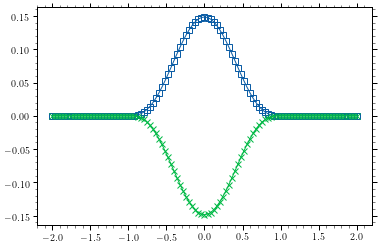

In [5]:
x = np.linspace(-2, 2, 101)
plt.plot(x, mu_1(x, 1), "-s", x, mu_11(x, 1), "-x");

## Higher-order Moments

---
The kth-order moment is

\begin{equation}
    \mu_k = \int (\vec{x}-\vec{x}_b)^k\cdot\hat{n}\phi_\varepsilon(\vec{x}\cdot\hat{n}, \vec{x}_b\cdot\hat{n})\,\,\text{d}\vec{x}_b^{\hat{n}}
\end{equation}

this is non-zero and of opposit sign at $x=\pm\varepsilon$...

### On a different function than a constant or linear function

\begin{equation}
    \frac{\bar{u}}{U_{\text{max}}} = \eta^n
\end{equation}


In [6]:
def profile(eta, n=1./7.): 
    return abs(eta)**n

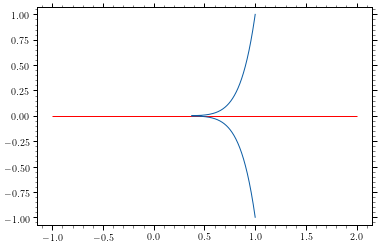

In [7]:
y = np.linspace(-1, 1, 1000)
plt.plot(profile(y), y); plt.hlines(0, xmin=-1, xmax=2, color='r')
plt.axis('equal');

In [8]:
def channel_exact_solution(y, nu, L=1, t=1, k=1):
    u = np.zeros_like(y)
    Re = L**2/(nu*t)
    print(Re)
    for i in range(k):
#         print(np.exp(-(2*i+1)**2*np.pi**2/Re))
        u += np.exp(-(2*i+1)**2*np.pi**2/Re)*np.sin((2*i+1)*np.pi*y/L)
    return u/u.max()

In [9]:
def Poisseuil(y, nu, L=1, fx=0.1):
    u = 1/(2*nu)*y*(L-y)
    return u/np.max(u)

100.0


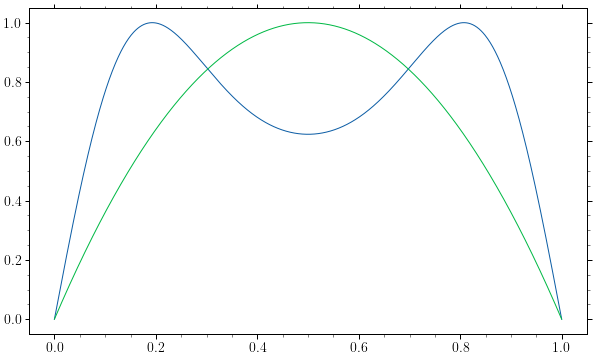

In [102]:
y = np.linspace(0, 1, 1000)
plt.plot(y, channel_exact_solution(y, .01, k=15))
plt.plot(y, Poisseuil(y, 1e-1));

In [11]:
Delta99 = lambda Re : 3.65/np.sqrt(Re)

In [60]:
def L(f, dy):
    d2fdy2 = np.zeros_like(f)
    d2fdy2[1:-1] = 1./(dy**2)*(f[:-2] - 2*f[1:-1] + f[2:])
    d2fdy2[0] = 1./(dy**2)*(2*f[0] -5*f[1] +4*f[2] - f[3])
    d2fdy2[-1] = 1./(dy**2)*(-2*f[-1]+5*f[-2]-4*f[-3]+f[-4])
    return d2fdy2

In [61]:
def D(f, dy):
    der = np.zeros_like(f)
    der[1:-1] = (1./(2*dy))*(-f[:-2] + f[2:]) 
    der[0] = (1./(2*dy))*(-3*f[0] + 2*f[1] - f[2])
    der[-1]= (1./(2*dy))*( 3*f[-1]- 2*f[-2]+ f[-3]) 
    return der

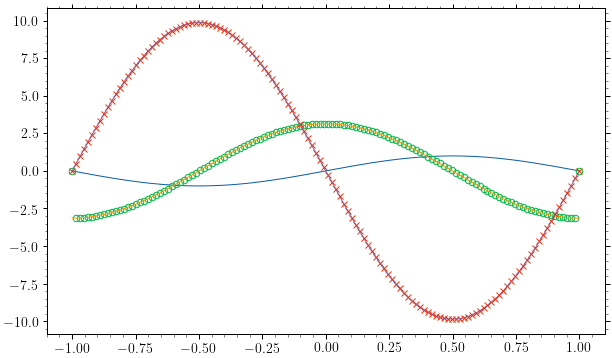

In [105]:
N = 128
y, dy = np.linspace(-1, 1, N, retstep=True)

f = np.sin(y*np.pi)

df = D(f, dy)
ddf = L(f, dy)

plt.plot(y, f)
plt.plot(y, df, 'o')
plt.plot(y, np.pi*np.cos(np.pi*y))
plt.plot(y, ddf, 'x')
plt.plot(y, -np.pi**2*np.sin(np.pi*y));

In [106]:
def dist_channel(N, t=8):
    d = np.arange(N)
    return np.minimum(d-t,(N-t)-d) 

In [107]:
def update(u0, mu0, dt, dy):
    un = mu0*(u0 + dt*nu*L(u0, dy))
    return un

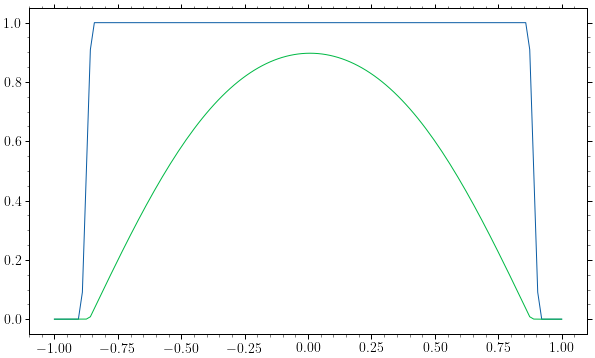

In [111]:
mu0 = mu_0(dist_channel(N), e=2)
u0 = np.ones(N)*mu0 + np.zeros(N)*(1.-mu0)
nu = 1e-3; dt = 1e-2
Niter = 10000

plt.plot(y, u0)
for _ in range(Niter):
    un = update(u0, mu0, dt, dy)
    u0 = un
plt.plot(y, un);

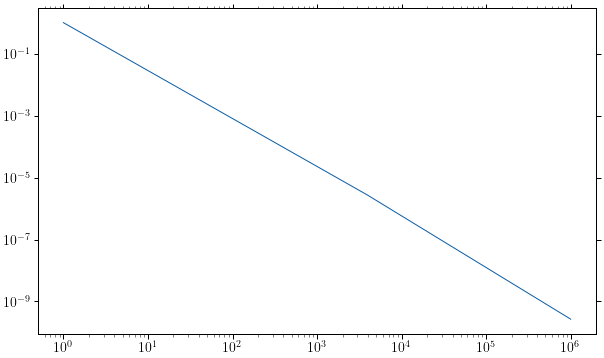

In [94]:
def von_karman_profile(k, a=2.682, b=0.417):
    return a*k**4/((b+k**2)**(17./6.))

k = np.linspace(1, 1e6, 256)
plt.loglog(k, von_karman_profile(k));